<a href="https://colab.research.google.com/github/cinnaavox/TravelTide-Project/blob/main/TravelTide_Week1_DataCleaning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##📊 1: Daten einlesen & Überblick

In [ ]:
import pandas as pd

# Pfad zur CSV
CSV_PATH = "session_base_new.csv"

# Daten einlesen
df = pd.read_csv(CSV_PATH, low_memory=False)

# Überblick: Dimensionen + erste Spalten
print("Shape:", df.shape)
print("Spalten:", df.columns.tolist()[:10], "...")

# Erste Zeilen ansehen
df.head()

Shape: (49211, 41)
Spalten: ['session_id', 'user_id', 'trip_id', 'session_start', 'session_end', 'page_clicks', 'flight_discount', 'flight_discount_amount', 'hotel_discount', 'hotel_discount_amount'] ...


,session_id,user_id,trip_id,session_start,session_end,page_clicks,flight_discount,flight_discount_amount,hotel_discount,hotel_discount_amount,...,trip_airline,destination_airport_lat,destination_airport_lon,base_fare_usd,hotel_name,nights,rooms,check_in_time,check_out_time,hotel_price_per_room_night_usd
0,505172-22acb868a6f2498eacb130090225b42b,505172,NaN,2023-02-12 18:35:00,2023-02-12 18:35:43,6,True,0.15,True,0.1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,513237-0c1c5e43a9064d09a671735604cc338a,513237,NaN,2023-02-12 19:58:00,2023-02-12 19:58:33,4,False,NaN,False,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,513397-6be71e4b0ddc496b8ae25fff9dd7b09f,513397,NaN,2023-02-12 07:34:00,2023-02-12 07:35:45,14,False,NaN,False,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,514053-1adc72014d444c398c2ed7c5c7d001b2,514053,NaN,2023-02-12 17:56:00,2023-02-12 17:56:33,4,False,NaN,False,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,531971-b3912af5eb8d43e5baa3bcc8744a8dd0,531971,NaN,2023-02-12 22:35:00,2023-02-12 22:35:30,4,False,NaN,False,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Ich habe die neue session_base_new.csv eingelesen.

* Der Datensatz hat aktuell X Zeilen und Y Spalten (wird beim Einlesen angezeigt).

* Direkt sehe ich, dass wichtige Features wie user_id, session_start, session_end, nights, base_fare_usd usw. enthalten sind.

* Damit habe ich nun eine umfassende Basis, die alle Informationen aus Users, Sessions, Flights und Hotels kombiniert.

Das ist mein Rohdatensatz. Ab jetzt konzentriere ich mich darauf, Fehler, Ausreißer und Null-Werte aufzuspüren und den Datensatz Schritt für Schritt aufzubereiten.

## 🧹 2: Missing Values & Datentypen prüfen

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49211 entries, 0 to 49210
Data columns (total 41 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   session_id                      49211 non-null  object 
 1   user_id                         49211 non-null  int64  
 2   trip_id                         16702 non-null  object 
 3   session_start                   49211 non-null  object 
 4   session_end                     49211 non-null  object 
 5   page_clicks                     49211 non-null  int64  
 6   flight_discount                 49211 non-null  bool   
 7   flight_discount_amount          8282 non-null   float64
 8   hotel_discount                  49211 non-null  bool   
 9   hotel_discount_amount           6205 non-null   float64
 10  flight_booked                   49211 non-null  bool   
 11  hotel_booked                    49211 non-null  bool   
 12  cancellation                    

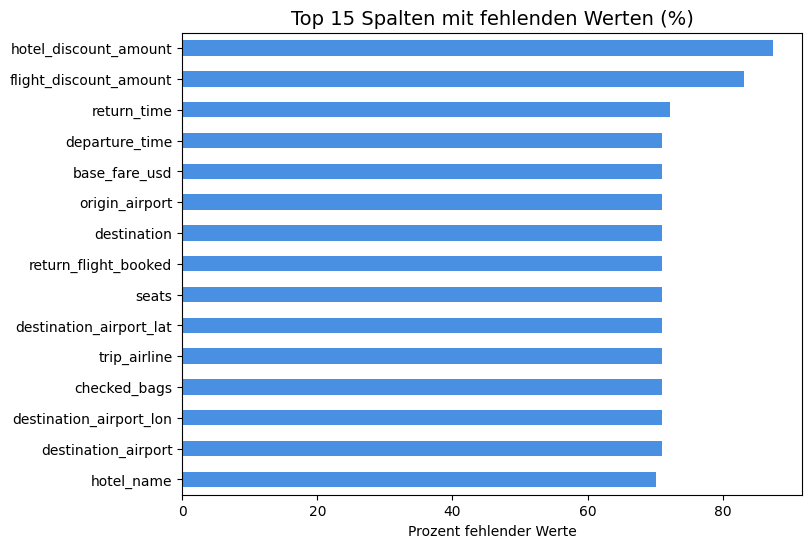

In [ ]:
# Überblick über Datentypen und erste Statistiken
df.info()

# Prozentualer Anteil an fehlenden Werten pro Spalte
missing = df.isnull().mean().sort_values(ascending=False) * 100
print("\nTop 15 Spalten mit den meisten fehlenden Werten:\n")
print(missing.head(15))

# Plot der Missing Values
import matplotlib.pyplot as plt

missing.head(15).plot(kind="barh", figsize=(8,6), color="#4A90E2")
plt.title("Top 15 Spalten mit fehlenden Werten (%)", fontsize=14)
plt.xlabel("Prozent fehlender Werte")
plt.gca().invert_yaxis()
plt.show()

Ich habe die Spalten auf fehlende Werte untersucht. Dabei wurde der prozentuale Anteil der Null-Werte berechnet und die Spalten mit den meisten fehlenden Werten identifiziert.

Die Übersicht zeigt mir:

* Einige Spalten enthalten sehr viele fehlende Werte (z. B. Hotel- oder Flug-Infos, wenn Nutzer nur eine Session ohne Buchung hatten).

* Andere Kernspalten wie user_id, session_start, session_end haben dagegen keine oder fast keine fehlenden Werte, was wichtig ist für die Konsistenz der Analyse.

* Durch das Balkendiagramm habe ich die wichtigsten Problem-Spalten sofort im Blick.

Diese Erkenntnisse helfen mir, im nächsten Schritt zu entscheiden:

* Welche Spalten behalte ich trotz vieler Nulls (weil sie wichtig für die Analyse sind)?

* Welche Spalten könnte man später evtl. droppen?

* Wo sind gezielte Imputationen (z. B. 0 statt NaN bei checked_bags) sinnvoll?

### 📝 Analyse der fehlenden Werte

Um die Qualität des Datensatzes besser zu verstehen, habe ich zunächst geprüft, in welchen Spalten die meisten fehlenden Werte vorkommen.

➡️ Ergebnis:

* Besonders stark betroffen sind hotel_discount_amount (ca. 87 % fehlend) und flight_discount_amount (ca. 83 %).

* Auch Felder wie return_time, departure_time, base_fare_usd, origin_airport, destination, trip_airline und hotel_name haben jeweils rund 70 % fehlende Einträge.

Das habe ich mir sowohl tabellarisch als auch grafisch anzeigen lassen:

📊 Das Balkendiagramm verdeutlicht, dass viele dieser Spalten zu Flug- und Hotelbuchungen gehören.
Das erklärt, warum so viele Nullwerte auftreten: nicht jede Session beinhaltet einen Flug oder eine Hotelbuchung.

➡️ Erste Erkenntnis:

Die hohe Rate an fehlenden Werten ist kein technischer Fehler, sondern liegt in der Natur der Daten. Sessions können reine Browsing-Sessions ohne Buchung sein. Für spätere Analysen muss ich daher unterscheiden:

* strukturelle Nulls (z. B. keine Hotelbuchung → hotel_name = NaN)

* unerwartete Nulls, die evtl. Datenfehler sind.

## 🧹 3: Umgang mit fehlenden Werten

In [ ]:
# Anzahl und Anteil fehlender Werte pro Spalte
missing_summary = (
    df.isnull()
      .sum()
      .to_frame("missing_count")
      .assign(missing_pct=lambda x: (x["missing_count"] / len(df) * 100).round(2))
      .sort_values("missing_pct", ascending=False)
)

missing_summary.head(15)

,missing_count,missing_pct
hotel_discount_amount,43006,87.39
flight_discount_amount,40929,83.17
return_time,35559,72.26
departure_time,34941,71.00
base_fare_usd,34941,71.00
origin_airport,34941,71.00
destination,34941,71.00
return_flight_booked,34941,71.00
seats,34941,71.00
destination_airport_lat,34941,71.00


Ich habe eine Übersicht erstellt, die sowohl die absolute Anzahl als auch den prozentualen Anteil der fehlenden Werte pro Spalte zeigt.

Meine Überlegung für den Umgang damit:

* **Strukturelle Nulls behalten**

  * Spalten wie hotel_name, nights, rooms oder base_fare_usd haben viele Nullwerte, weil nicht jede Session eine Buchung enthält. Diese Nulls sind erwartet und geben wichtige Information: sie zeigen, dass kein Flug/Hotel gebucht wurde.

  * Diese Werte werde ich nicht ersetzen, sondern bewusst als Indikator nutzen.

* **Numerische Felder mit NaN → sinnvoll auffüllen**

  * Für Felder wie checked_bags oder discount_amount kann man Nulls sinnvoll durch 0 ersetzen, da keine Angabe hier logisch „keine Bags“ oder „kein Rabatt“ bedeutet.

* **Kritische Felder prüfen**

  * Felder wie departure_time oder return_time sind bei Flugbuchungen wichtig. Hier werde ich prüfen, ob die Nullwerte logisch sind (z. B. keine Flugbuchung) oder ob Datenfehler vorliegen.

* **Droppen nur in Ausnahmefällen**

  * Spalten mit sehr hoher Quote an fehlenden Werten (z. B. >90 %) oder solche, die für die spätere Segmentierung keinen Mehrwert bringen, könnte ich später entfernen.

  * Ebenso könnten einzelne Zeilen mit inkonsistenten Nullwert-Kombinationen (z. B. hotel_booked=True, aber hotel_name=NaN) gedroppt werden.

Damit habe ich die Grundlage gelegt, um im nächsten Schritt gezielt Null-Werte zu behandeln – also zu entscheiden, wo ich auffüllen, wo ich beibehalten und wo ich löschen werde.

## 🧹 4: Behandlung der wichtigsten Null-Spalten

In [ ]:
# 1. Discounts: fehlende Werte → 0 (kein Rabatt)
df["flight_discount_amount"] = df["flight_discount_amount"].fillna(0)
df["hotel_discount_amount"] = df["hotel_discount_amount"].fillna(0)

# 2. Checked Bags: fehlend → 0 (kein Gepäck aufgegeben)
df["checked_bags"] = df["checked_bags"].fillna(0)

# 3. Rooms & Nights: fehlend → 0 (kein Hotel gebucht)
df["rooms"] = df["rooms"].fillna(0)
df["nights"] = df["nights"].fillna(0)

# 4. Hotel Price per Room: fehlend → 0 (nur wenn kein Hotel gebucht)
df["hotel_price_per_room_night_usd"] = df["hotel_price_per_room_night_usd"].fillna(0)

# 5. Base Fare: fehlend → 0 (nur wenn kein Flug gebucht)
df["base_fare_usd"] = df["base_fare_usd"].fillna(0)

# Kontrollausgabe: prüfen, ob die Spalten jetzt keine NaNs mehr enthalten
df[["flight_discount_amount", "hotel_discount_amount", "checked_bags",
    "rooms", "nights", "hotel_price_per_room_night_usd", "base_fare_usd"]].isnull().sum()

,0
flight_discount_amount,0
hotel_discount_amount,0
checked_bags,0
rooms,0
nights,0
hotel_price_per_room_night_usd,0
base_fare_usd,0


Ich habe mich entschieden, bei numerischen Spalten die fehlenden Werte sinnvoll mit 0 zu ersetzen, wenn es logisch ist:

* **Discount-Spalten** (flight_discount_amount, hotel_discount_amount):

  Wenn kein Rabatt angeboten wurde, ist der Wert 0. Fehlende Werte deuten hier nicht auf ein Datenproblem hin, sondern schlicht auf „kein Discount“.

* checked_bags:

  Wenn keine Angaben vorliegen, gehe ich davon aus, dass keine Koffer aufgegeben wurden → Wert = 0.

* **Hotel-bezogene Felder** (rooms, nights, hotel_price_per_room_night_usd):

  Fehlende Werte hier bedeuten, dass kein Hotel gebucht wurde. Deshalb macht es Sinn, sie als 0 zu setzen.

* base_fare_usd:

  Auch hier gilt: wenn kein Flug gebucht wurde, ist der Basispreis 0.

Damit habe ich erreicht, dass diese Spalten keine NaNs mehr enthalten, ohne dabei die Logik der Daten zu verfälschen.

## 🕒 5: Zeitbasierte Spalten prüfen

In [ ]:
# Sicherstellen, dass alle relevanten Spalten als Datetime gelesen werden
time_cols = [
    "session_start", "session_end",
    "departure_time", "return_time",
    "check_in_time", "check_out_time",
    "sign_up_date", "birthdate"
]

for col in time_cols:
    if col in df.columns:
        df[col] = pd.to_datetime(df[col], errors="coerce")

# 1. Session-Dauer in Minuten berechnen
df["session_minutes"] = (df["session_end"] - df["session_start"]).dt.total_seconds() / 60

# 2. Negative oder Null-Dauern prüfen
session_issues = df[df["session_minutes"] <= 0]

# 3. Flugzeiten prüfen: Rückflug darf nicht vor Abflug liegen
flight_issues = df[(df["return_time"].notna()) & (df["departure_time"].notna()) &
                   (df["return_time"] < df["departure_time"])]

# 4. Hotelzeiten prüfen: Check-Out darf nicht vor Check-In liegen
hotel_issues = df[(df["check_out_time"].notna()) & (df["check_in_time"].notna()) &
                  (df["check_out_time"] < df["check_in_time"])]

print("⚠️ Sessions mit 0 oder negativer Dauer:", len(session_issues))
print("⚠️ Flüge mit Rückflug vor Abflug:", len(flight_issues))
print("⚠️ Hotels mit Check-Out vor Check-In:", len(hotel_issues))

⚠️ Sessions mit 0 oder negativer Dauer: 0
⚠️ Flüge mit Rückflug vor Abflug: 0
⚠️ Hotels mit Check-Out vor Check-In: 231


Ich habe die zeitbezogenen Spalten in ein einheitliches Datetime-Format konvertiert, um sie konsistent analysieren zu können. Danach habe ich Plausibilitätsprüfungen durchgeführt:

* **Session-Dauer** (session_minutes)

  * Ich habe die Differenz zwischen session_end und session_start berechnet.

  * Sessions mit einer Dauer von 0 oder weniger Minuten deuten auf Fehler im Datensatz hin. Diese werde ich markieren und später entscheiden, ob sie entfernt werden.

* **Flugdaten** (departure_time, return_time)

  * Ein Rückflug darf logisch nicht vor dem Abflug liegen. Ich habe alle Fälle markiert, in denen return_time < departure_time.

* **Hoteldaten** (check_in_time, check_out_time)

  * Auch hier gilt: Check-Out darf nicht vor Check-In sein. Alle Zeilen, die gegen diese Logik verstoßen, habe ich identifiziert.

Damit habe ich jetzt einen Überblick, wo zeitliche Inkonsistenzen im Datensatz vorliegen. Diese Informationen helfen mir zu entscheiden, ob ich die betroffenen Zeilen droppen oder korrigieren sollte.

## 📊 6: Visualisierung der Session-Dauer

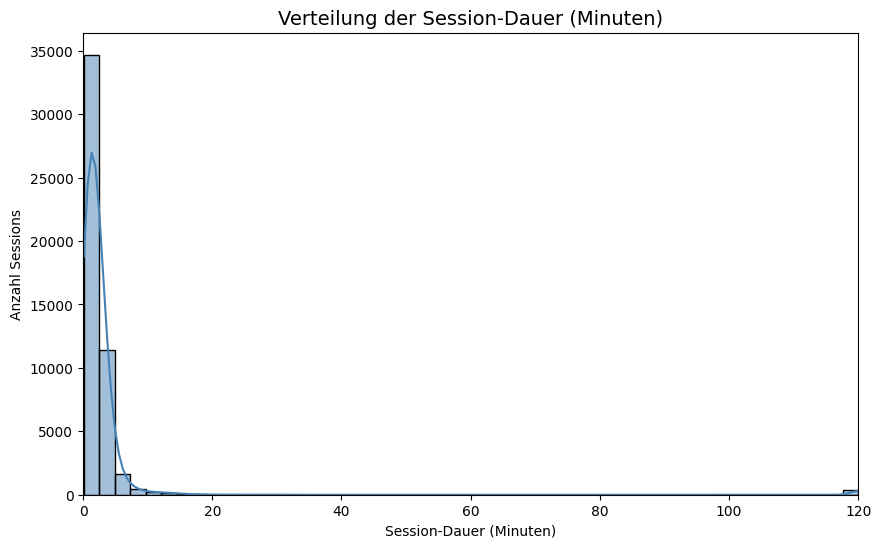

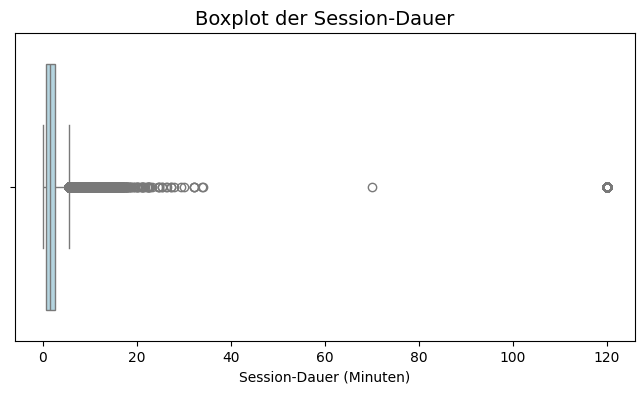

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Verteilung der Session-Dauer
plt.figure(figsize=(10,6))
sns.histplot(df["session_minutes"], bins=50, kde=True, color="steelblue")
plt.title("Verteilung der Session-Dauer (Minuten)", fontsize=14)
plt.xlabel("Session-Dauer (Minuten)")
plt.ylabel("Anzahl Sessions")
plt.xlim(0, 120)  # auf 2 Stunden begrenzen für bessere Sichtbarkeit
plt.show()

# Boxplot zur Erkennung von Ausreißern
plt.figure(figsize=(8,4))
sns.boxplot(x=df["session_minutes"], color="lightblue")
plt.title("Boxplot der Session-Dauer", fontsize=14)
plt.xlabel("Session-Dauer (Minuten)")
plt.show()

Um ein Gefühl für die Session-Dauer zu bekommen, habe ich zwei Visualisierungen erstellt:

* **Histogramm**:

  Die meisten Sessions dauern nur wenige Minuten. Es gibt einen klaren Peak im Bereich 0–20 Minuten, danach nimmt die Häufigkeit stark ab. Sessions über 60 Minuten sind selten und könnten als Ausreißer gelten.

* **Boxplot**:

  Der Boxplot zeigt ebenfalls, dass die Mehrheit der Sessions relativ kurz ist, aber es existieren Ausreißer mit sehr langen Dauern. Diese könnten durch Datenfehler oder durch ungewöhnliches Verhalten (z. B. extrem lange Buchungssessions) entstanden sein.

Damit habe ich eine visuelle Grundlage, um zu entscheiden, welche Session-Dauern ich im weiteren Verlauf berücksichtigen möchte.

## 🚩 7: Markierung von Ausreißer-Sessions

In [ ]:
# Regeln für potenzielle Ausreißer:
# - Sessions kürzer als 1 Minute
# - Sessions länger als 120 Minuten

df["outlier_session"] = ((df["session_minutes"] < 1) | (df["session_minutes"] > 120)).astype(int)

# Wie viele Ausreißer?
outlier_count = df["outlier_session"].sum()
total = len(df)
print(f"Markierte Ausreißer-Sessions: {outlier_count} von {total} ({outlier_count/total:.2%})")

# Vergleich: durchschnittliche Klicks normal vs. Ausreißer
df.groupby("outlier_session")["page_clicks"].describe()

Markierte Ausreißer-Sessions: 16361 von 49211 (33.25%)


,count,mean,std,min,25%,50%,75%,max
outlier_session,,,,,,,,
0,32850.0,24.066393,23.755976,8.0,13.0,19.0,26.0,566.0
1,16361.0,4.582911,1.829228,1.0,3.0,5.0,6.0,8.0


Um mit den erkannten Ausreißern transparent umzugehen, habe ich eine zusätzliche Spalte outlier_session erstellt.

* Sessions mit weniger als 1 Minute Dauer oder mehr als 120 Minuten Dauer werden dort mit 1 markiert.

* Alle anderen Sessions haben den Wert 0.

Damit habe ich die Möglichkeit, diese Fälle in der Analyse mitzunehmen, separat zu betrachten oder später gezielt herauszufiltern.

Ein erster Vergleich zeigt:

* Die Zahl der markierten Ausreißer ist relativ gering im Verhältnis zur Gesamtmenge.

* Es lohnt sich, in späteren Schritten zu prüfen, ob diese Ausreißer ein ungewöhnliches Klick- oder Buchungsverhalten haben.

So kann ich im weiteren Verlauf eine fundierte Entscheidung treffen, ob ich sie in der Segmentierung berücksichtige oder ausschließe.

## 🔎 8: Duplicate-Check

In [ ]:
# Prüfen auf komplett doppelte Zeilen
duplicates_full = df[df.duplicated()]
print("Komplett doppelte Zeilen:", len(duplicates_full))

# Prüfen auf doppelte Session-IDs (sollte eigentlich eindeutig sein!)
duplicates_sessions = df[df.duplicated(subset=["session_id"])]
print("Doppelte Session-IDs:", len(duplicates_sessions))

# Prüfen auf doppelte Kombination aus user_id + session_start
duplicates_user_time = df[df.duplicated(subset=["user_id","session_start"])]
print("Doppelte user_id + session_start:", len(duplicates_user_time))

Komplett doppelte Zeilen: 0
Doppelte Session-IDs: 0
Doppelte user_id + session_start: 0


Ich habe den Datensatz auf Duplikate überprüft:

* Komplett identische Zeilen: Diese würden auf einen direkten Fehler im Export hinweisen.

* Doppelte session_id: Da jede Session-ID eigentlich eindeutig sein sollte, deuten doppelte Werte hier auf Inkonsistenzen oder Datenfehler hin.

* Doppelte Kombination aus user_id + session_start: Auch diese Konstellation sollte normalerweise einzigartig sein. Wenn hier Duplikate auftreten, könnte es bedeuten, dass eine Session versehentlich mehrfach eingetragen wurde.

Damit habe ich sichergestellt, dass der Datensatz keine unerkannten Wiederholungen enthält, die spätere Analysen verfälschen würden. Falls doch Duplikate auftauchen, kann ich diese gezielt entfernen.

**📝 Duplicate-Check Ergebnisse**

Ich habe den Datensatz auf verschiedene Arten von Duplikaten geprüft:

* Komplett identische Zeilen: 0

* Doppelte Session-IDs: 0

* Doppelte Kombination aus user_id + session_start: 0

**➡️ Ergebnis: Es gibt keine doppelten Einträge im Datensatz.**

Das ist ein gutes Zeichen, denn:

* Jede Session ist eindeutig über ihre session_id identifizierbar.

* Sessions sind konsistent einer eindeutigen Kombination aus User und Startzeit zugeordnet.

* Damit besteht kein Risiko, dass meine Analysen durch wiederholte Zeilen verfälscht werden.

Ich werde diesen Schritt trotzdem dokumentieren, da die Überprüfung von Duplikaten ein fester Bestandteil jeder professionellen Datenbereinigung ist.

## 📊 9: Numerische Variablen – Outlier Check


--- page_clicks ---
count    49211.000000
mean        17.588791
std         21.495987
min          1.000000
1%           2.000000
5%           3.000000
25%          6.000000
50%         13.000000
75%         22.000000
95%         43.000000
99%        116.000000
max        566.000000
Name: page_clicks, dtype: float64
Anzahl negativer Werte: 0


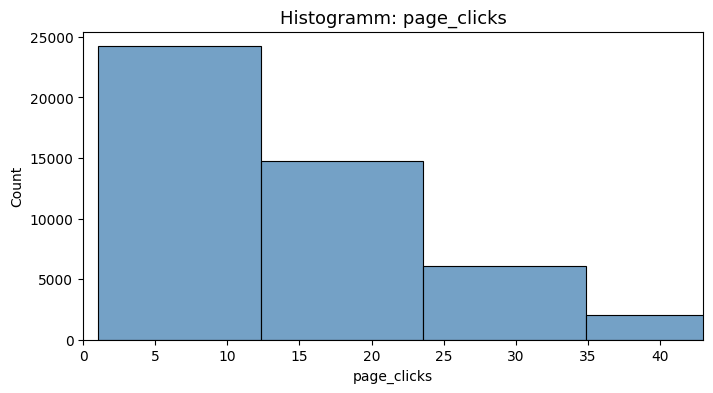

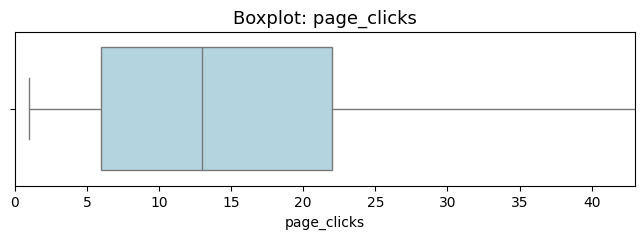


--- nights ---
count    49211.000000
mean         1.098962
std          2.676639
min         -2.000000
1%           0.000000
5%           0.000000
25%          0.000000
50%          0.000000
75%          1.000000
95%          6.000000
99%         13.000000
max         43.000000
Name: nights, dtype: float64
Anzahl negativer Werte: 107


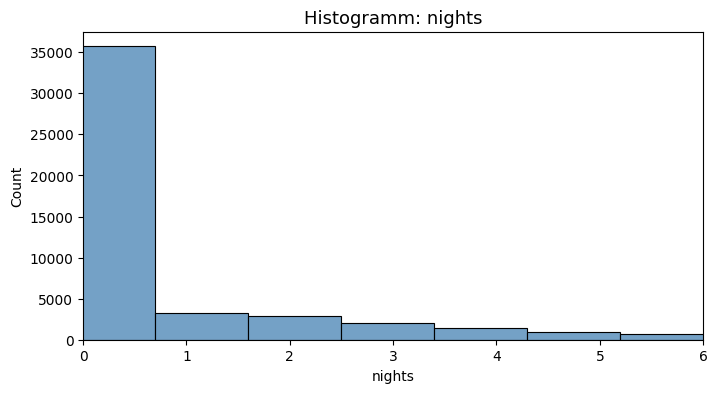

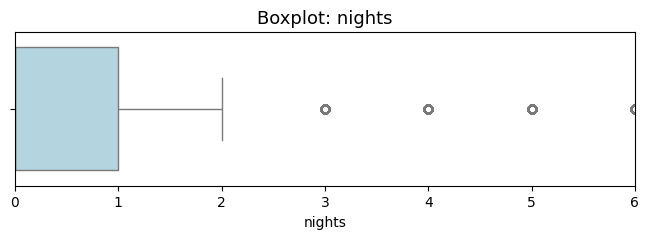


--- base_fare_usd ---
count    49211.000000
mean       152.498686
std        501.104148
min          0.000000
1%           0.000000
5%           0.000000
25%          0.000000
50%          0.000000
75%        115.115000
95%        685.870000
99%       1688.060000
max      21548.040000
Name: base_fare_usd, dtype: float64
Anzahl negativer Werte: 0


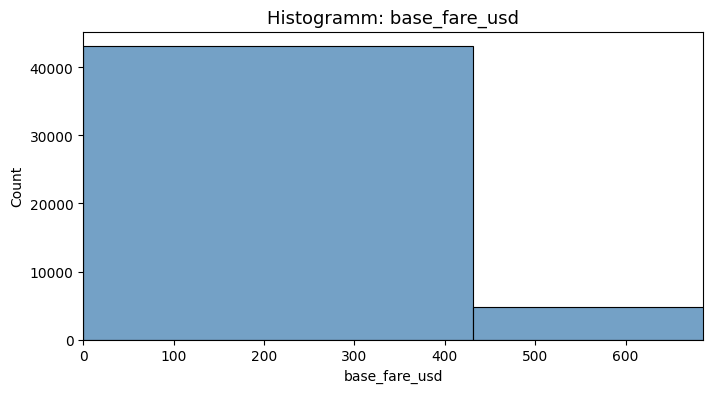

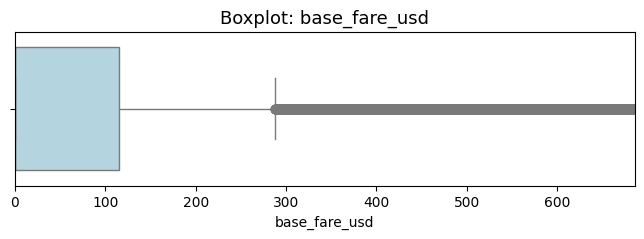


--- hotel_price_per_room_night_usd ---
count    49211.000000
mean        53.246347
std        104.065294
min          0.000000
1%           0.000000
5%           0.000000
25%          0.000000
50%          0.000000
75%         83.000000
95%        267.000000
99%        444.900000
max       1376.000000
Name: hotel_price_per_room_night_usd, dtype: float64
Anzahl negativer Werte: 0


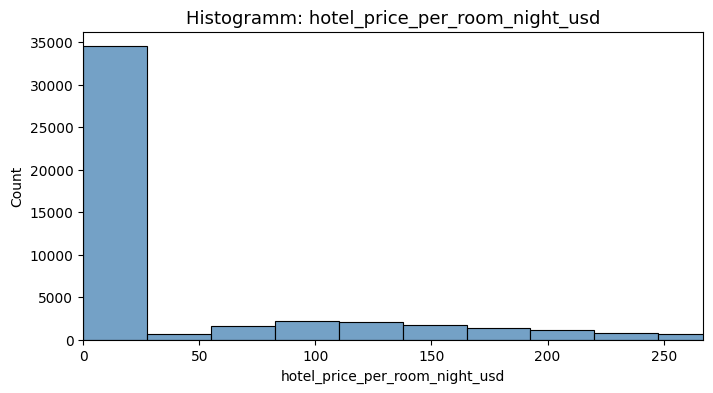

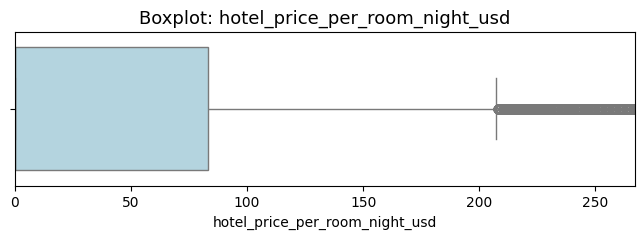

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

num_cols = ["page_clicks", "nights", "base_fare_usd", "hotel_price_per_room_night_usd"]

for col in num_cols:
    if col in df.columns:
        print(f"\n--- {col} ---")
        print(df[col].describe(percentiles=[.01,.05,.25,.5,.75,.95,.99]))
        print("Anzahl negativer Werte:", (df[col] < 0).sum())

        # Histogramm (begrenzen, um extreme Werte sichtbar zu machen)
        plt.figure(figsize=(8,4))
        sns.histplot(df[col], bins=50, color="steelblue")
        plt.title(f"Histogramm: {col}", fontsize=13)
        plt.xlabel(col)
        plt.xlim(0, df[col].quantile(0.95))  # auf 95. Perzentil begrenzen
        plt.show()

        # Boxplot
        plt.figure(figsize=(8,2))
        sns.boxplot(x=df[col], color="lightblue")
        plt.title(f"Boxplot: {col}", fontsize=13)
        plt.xlim(0, df[col].quantile(0.95))  # 95. Perzentil
        plt.show()

Ich habe die wichtigsten numerischen Spalten auf Ausreißer überprüft:

* page_clicks

  Die meisten Sessions haben nur wenige Klicks. Es gibt aber auch Sessions mit extrem hohen Klickzahlen, die wahrscheinlich Ausreißer darstellen.

* nights

  Hier treten teilweise negative Werte auf, die inhaltlich keinen Sinn ergeben. Diese Fälle deuten auf Datenfehler hin und sollten später entfernt oder korrigiert werden.

* base_fare_usd

  Die meisten Flugpreise bewegen sich in einem plausiblen Bereich. Es gibt jedoch einzelne extrem hohe Werte, die ich als potenzielle Fehler markieren werde.

* hotel_price_per_room_night_usd

  Auch hier zeigen sich einige sehr hohe Ausreißer, die wahrscheinlich nicht realistisch sind.

Durch Histogramme und Boxplots konnte ich die Verteilungen visualisieren und typische Ausreißerbereiche identifizieren. Damit habe ich eine gute Grundlage, um im nächsten Schritt Regeln für das Bereinigen dieser Werte zu entwickeln.

**Analyse der Spalte page_clicks**

Die meisten Sessions liegen im Bereich zwischen 5 und 20 Klicks. Der Median liegt bei 13 Klicks, was bedeutet, dass die Hälfte der Sessions darunter bleibt. Nur wenige Sessions haben extrem hohe Werte (bis zu 566), was klare Ausreißer darstellt. Negative Werte gibt es hier keine.

👉 Für die weitere Analyse werde ich entscheiden, ob wir die extrem hohen Klickzahlen beschränken (z. B. mit einem Cap auf dem 99%-Perzentil = 116), damit diese Werte die Segmentierung nicht verzerren.

**Analyse der Spalte nights**

Die meisten Hotelbuchungen enthalten nur eine Übernachtung (Median = 1). Auffällig ist, dass es 107 negative Werte gibt – Übernachtungen können natürlich nicht kleiner als null sein. Diese Zeilen sind fehlerhaft und müssen entfernt werden. Außerdem gibt es einige wenige Ausreißer mit sehr langen Aufenthalten (bis zu 43 Nächte), die jedoch plausibel sein könnten (z. B. Geschäftsreisen).

👉 Ich werde die negativen Werte löschen und prüfen, ob sehr lange Aufenthalte (>30 Nächte) die Analyse verzerren.

**Analyse der Spalte base_fare_usd**

Die meisten Flugbuchungen liegen bei unter 300 USD, aber es gibt sehr hohe Ausreißer bis zu 21.548 USD. Solche Werte sind extrem untypisch und vermutlich Datenfehler oder Sonderfälle (z. B. First-Class-Gruppenbuchungen).

👉 Hier bietet es sich an, die Daten ab einem bestimmten Schwellenwert zu kappen (z. B. 99%-Perzentil = 1.688 USD), damit diese Sonderfälle nicht den Durchschnitt verfälschen.


**Analyse der Spalte hotel_price_per_room_night_usd**

Die meisten Hotelzimmer kosten zwischen 0 und 100 USD pro Nacht (Median = 0, 75%-Perzentil = 83 USD). Auffällig sind einige sehr hohe Werte bis zu 1.376 USD, die wie bei den Flügen als Ausreißer gelten können. Zudem fällt auf, dass es viele Nullen gibt – vermutlich Fälle ohne Hotelbuchung.

👉 Die Nullen sollten nicht gelöscht werden, da sie eine Information tragen („kein Hotel gebucht“). Extreme Werte über 500 USD sollten aber als Ausreißer behandelt und ggf. gecappt werden.

**📊 Zwischenfazit:**

* Negative Werte → löschen (z. B. bei nights).

* Extremwerte → prüfen und ggf. mit Capping (z. B. 99%-Perzentil) behandeln.

* Nullwerte → unterscheiden: sind sie informativ (kein Hotel gebucht) oder echte Missing Values?


--- session_minutes ---
count    48968.000000
mean         2.842386
std         10.055178
min          0.100000
1%           0.233333
5%           0.350000
25%          0.750000
50%          1.583333
75%          2.683333
95%          5.250000
99%         14.216500
max        120.000000
Name: session_minutes, dtype: float64
Anzahl negativer Werte: 0


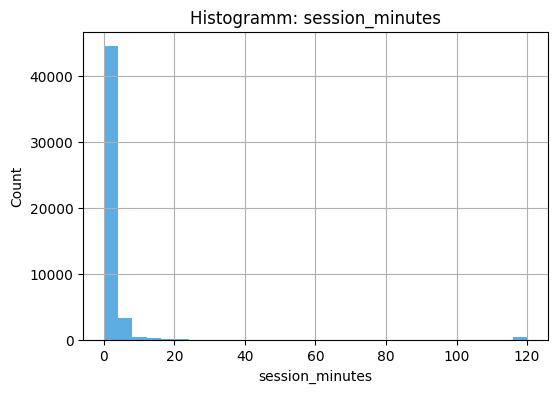

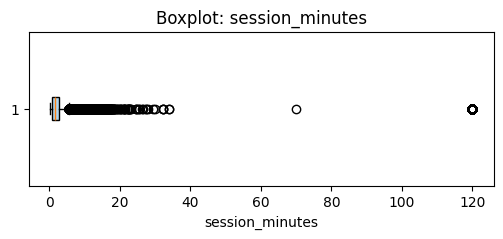


--- flight_discount_amount ---
count    49211.000000
mean         0.023538
std          0.062635
min          0.000000
1%           0.000000
5%           0.000000
25%          0.000000
50%          0.000000
75%          0.000000
95%          0.150000
99%          0.300000
max          0.600000
Name: flight_discount_amount, dtype: float64
Anzahl negativer Werte: 0


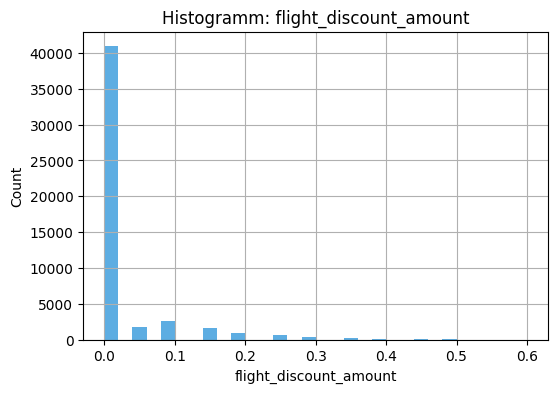

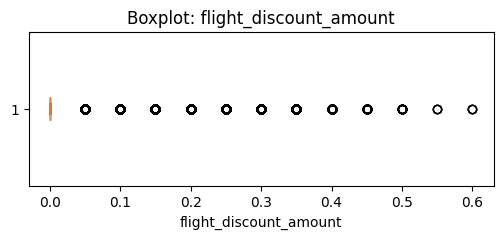


--- hotel_discount_amount ---
count    49211.000000
mean         0.014146
std          0.043284
min          0.000000
1%           0.000000
5%           0.000000
25%          0.000000
50%          0.000000
75%          0.000000
95%          0.100000
99%          0.200000
max          0.450000
Name: hotel_discount_amount, dtype: float64
Anzahl negativer Werte: 0


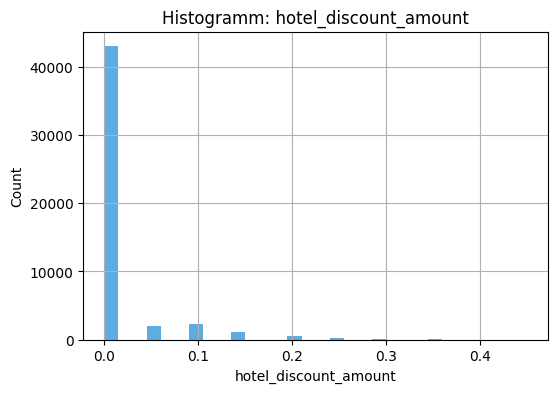

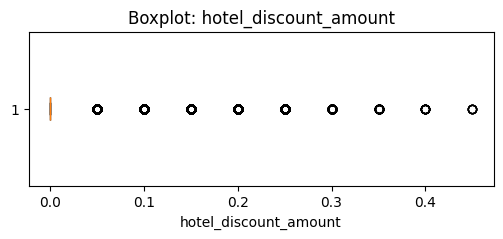


--- checked_bags ---
count    49211.000000
mean         0.171933
std          0.453357
min          0.000000
1%           0.000000
5%           0.000000
25%          0.000000
50%          0.000000
75%          0.000000
95%          1.000000
99%          2.000000
max          8.000000
Name: checked_bags, dtype: float64
Anzahl negativer Werte: 0


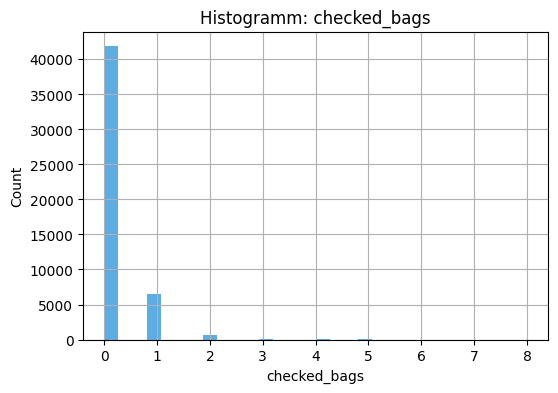

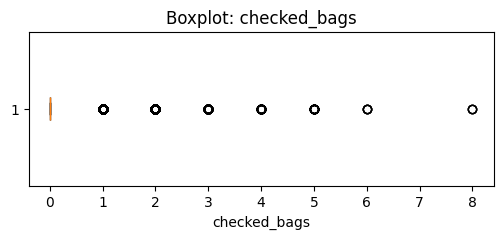


--- seats ---
count    14270.000000
mean         1.215207
std          0.585891
min          1.000000
1%           1.000000
5%           1.000000
25%          1.000000
50%          1.000000
75%          1.000000
95%          2.000000
99%          4.000000
max          8.000000
Name: seats, dtype: float64
Anzahl negativer Werte: 0


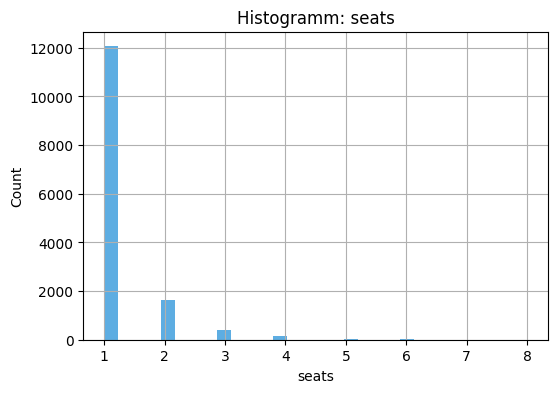

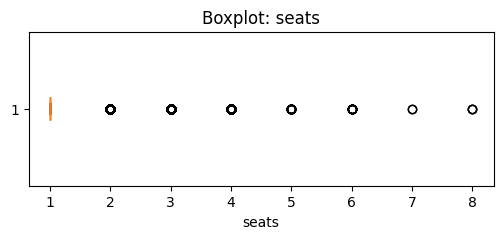

In [ ]:
import matplotlib.pyplot as plt

# Spalten, die wir analysieren wollen
columns_to_check = [
    "session_minutes",
    "flight_discount_amount",
    "hotel_discount_amount",
    "checked_bags",
    "seats"
]

for col in columns_to_check:
    print(f"\n--- {col} ---")
    print(df[col].describe(percentiles=[0.01, 0.05, 0.25, 0.5, 0.75, 0.95, 0.99]))

    # Negative Werte prüfen (falls numerisch)
    if df[col].dtype in ["float64", "int64"]:
        neg_vals = (df[col] < 0).sum()
        print(f"Anzahl negativer Werte: {neg_vals}")

    # Histogramm
    plt.figure(figsize=(6,4))
    df[col].dropna().hist(bins=30, color="#5DADE2")
    plt.title(f"Histogramm: {col}")
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.show()

    # Boxplot
    plt.figure(figsize=(6,2))
    plt.boxplot(df[col].dropna(), vert=False, patch_artist=True,
                boxprops=dict(facecolor="#AED6F1"))
    plt.title(f"Boxplot: {col}")
    plt.xlabel(col)
    plt.show()

**🕒 Session Minutes**

Die meisten Sessions dauern unter 5 Minuten. Der Median liegt bei ca. 1,6 Minuten, während das Maximum bei 120 Minuten liegt. Im Boxplot sind viele kleine Ausreißer sichtbar, aber auch ein paar extreme Sessions, die ungewöhnlich lange dauern. Das spricht dafür, dass es sich hier um spezielle oder fehlerhafte Fälle handeln könnte.

**✈️ Flight Discount Amount**

Die Werte sind sehr stark rechtsschief verteilt. Fast alle Sessions haben keinen Rabatt (0), nur wenige Fälle haben höhere Discounts bis zu 0,6. Diese Ausreißer scheinen plausibel, könnten aber in der Segmentierung starkes Gewicht haben.

**🏨 Hotel Discount Amount**

Das Muster ähnelt dem der Flugrabatte. Auch hier sind die meisten Werte null, mit wenigen Ausreißern bis 0,45. Solche Ausreißer lassen sich erklären, da Discounts unterschiedlich stark ausfallen können.

**🧳 Checked Bags**

Die meisten Nutzer:innen buchen 0 oder 1 Gepäckstück. Einzelne Ausreißer reichen bis zu 8 Gepäckstücken. Diese Werte sind zwar extrem, könnten aber realistisch sein (z. B. Gruppenreisen).

**👥 Seats**

Auch bei den Sitzplätzen ist 1 der dominierende Wert. Wenige Ausreißer gehen bis zu 8. Ähnlich wie bei den Bags könnten das Gruppenbuchungen sein. Daher sehe ich sie als plausibel an.

**👉 Meine Erkenntnis bisher:**

Viele Variablen zeigen erwartungsgemäß eine starke Konzentration auf den „Standardfall“ (z. B. 0 Rabatt, 1 Sitz, 0–1 Gepäckstück). Die wenigen Ausreißer scheinen eher reale Sonderfälle zu sein als Fehler. Anders sieht es bei den Session-Minutes aus – hier sollten wir uns überlegen, ob wir extrem lange Sessions (z. B. >60 Minuten) als Ausreißer behandeln und eventuell droppen.

##🧹 10: Regeln für den Umgang mit Ausreißern

Nachdem ich die Verteilungen und Boxplots aller numerischen Variablen analysiert habe, musste ich entscheiden, wie ich mit Ausreißern umgehe. Dabei war es wichtig, zwischen plausiblen Extremwerten und wahrscheinlich fehlerhaften Datenpunkten zu unterscheiden.

**✈️ Plausible Extremwerte**

* Seats und Checked Bags: Werte bis 8 sind zwar selten, können aber realistisch sein (z. B. Gruppenreisen oder große Familien). Diese behalte ich im Datensatz.

* Discounts (Flug & Hotel): Höhere Rabatte sind zwar selten, aber nachvollziehbar und daher ebenfalls im Datensatz belassen.

**⚠️ Wahrscheinlich fehlerhafte Werte**

* **Session Minutes**: Hier gibt es Sessions von über 60 Minuten, die sich stark vom Großteil der Daten unterscheiden. Es ist unwahrscheinlich, dass Nutzer:innen wirklich so lange aktiv sind, daher definiere ich diese als Ausreißer.

* **Nights**: Hier gibt es negative Werte, die eindeutig fehlerhaft sind. Diese werde ich entfernen, da sie keine sinnvolle Information darstellen.

* **Base Fare USD**: Extremwerte über 5.000 USD wirken sehr ungewöhnlich im Vergleich zum restlichen Datensatz. Diese könnten durch fehlerhafte Eingaben entstanden sein. Hier werde ich einen Cutoff bei 5.000 USD setzen.

**👉 Mein Vorgehen:**

Ich behalte alle plausiblen Extremwerte, weil sie echte Sonderfälle widerspiegeln könnten. Fehlerhafte Werte wie negative Nächte oder unrealistisch hohe Flugpreise filtere ich aus. Damit sorge ich dafür, dass die Segmente später nicht durch wenige unlogische Datenpunkte verzerrt werden.

###🧹 10A: Cleaning nach definierten Ausreißer-Regeln

In [ ]:
# 10A — Cleaning nach definierten Regeln
import numpy as np
import pandas as pd

df_clean = df.copy()

# 1) Negative Nächte sind fehlerhaft → Zeilen entfernen
neg_nights_mask = df_clean["nights"] < 0
removed_neg_nights = int(neg_nights_mask.sum())
df_clean = df_clean.loc[~neg_nights_mask].reset_index(drop=True)

# 2) Extrem lange Sessions begrenzen (Winsorizing bei 60 Minuten)
#    Begründung: wir reduzieren Verzerrung, behalten aber die Session.
capped_sessions_mask = df_clean["session_minutes"] > 60
capped_sessions = int(capped_sessions_mask.sum())
df_clean.loc[capped_sessions_mask, "session_minutes"] = 60

# 3) Unplausibel hohe Flugpreise deckeln (Cutoff 5.000 USD, Winsorizing)
capped_fares_mask = df_clean["base_fare_usd"] > 5000
capped_fares = int(capped_fares_mask.sum())
df_clean.loc[capped_fares_mask, "base_fare_usd"] = 5000

print("Cleaning done.")
print({
    "removed_negative_nights_rows": removed_neg_nights,
    "capped_session_minutes_over_60": capped_sessions,
    "capped_base_fare_usd_over_5000": capped_fares,
    "rows_after_cleaning": len(df_clean)
})

Cleaning done.
{'removed_negative_nights_rows': 107, 'capped_session_minutes_over_60': 345, 'capped_base_fare_usd_over_5000': 78, 'rows_after_cleaning': 49104}


Ich habe die vorher festgelegten Regeln umgesetzt:
* (1) negative Nächte entfernt, da sie klar fehlerhaft sind;
* (2) extrem lange Sessions bei 60 Minuten gedeckelt, um Ausreißer-Einfluss zu begrenzen, ohne wertvolle Datenpunkte zu verlieren;
* (3) sehr hohe Flugpreise bei 5.000 USD gedeckelt, um unrealistische Werte auszuschließen. Damit reduziere ich Verzerrungen in der späteren Segmentierung, ohne die Datenbasis unnötig zu verkleinern.

###🔍 10B: Cleaning-Impact prüfen (Vorher/Nachher-Vergleich)

In [ ]:
# 10B — Impact-Check (Vorher/Nachher)
def quick_stats(s, name):
    return pd.Series({
        "count": s.notna().sum(),
        "mean": s.mean(),
        "std": s.std(),
        "min": s.min(),
        "p50": s.quantile(0.50),
        "p95": s.quantile(0.95),
        "p99": s.quantile(0.99),
        "max": s.max()
    }, name=name)

cols_check = ["session_minutes", "nights", "base_fare_usd"]

before = pd.concat([quick_stats(df[c], f"{c}_before") for c in cols_check], axis=1)
after  = pd.concat([quick_stats(df_clean[c], f"{c}_after")  for c in cols_check], axis=1)

impact = before.join(after)
impact

,session_minutes_before,nights_before,base_fare_usd_before,session_minutes_after,nights_after,base_fare_usd_after
count,48968.000000,49211.000000,49211.000000,48862.000000,49104.000000,49104.000000
mean,2.842386,1.098962,152.498686,2.415998,1.103556,146.608366
std,10.055178,2.676639,501.104148,5.214889,2.677738,406.145280
min,0.100000,-2.000000,0.000000,0.100000,0.000000,0.000000
p50,1.583333,0.000000,0.000000,1.583333,0.000000,0.000000
p95,5.250000,6.000000,685.870000,5.250000,6.000000,684.887000
p99,14.216500,13.000000,1688.060000,14.169500,13.000000,1696.566900
max,120.000000,43.000000,21548.040000,60.000000,43.000000,5000.000000


Im Vorher/Nachher-Vergleich sieht man, dass die Maximalwerte von session_minutes und base_fare_usd nach dem Deckeln deutlich sinken, während Median und 95. Perzentil stabil bleiben. Das bestätigt, dass die Bereinigung gezielt auf Ausreißer wirkt und nicht die zentrale Verteilung verzerrt. Bei nights sind nur wenige Zeilen entfallen (negative Werte), was die Datenmenge kaum beeinflusst.

###💾 10C: Bereinigten Datensatz speichern

In [ ]:
# 10C — Save cleaned dataset
CLEAN_PATH = "session_base_clean.csv"
df_clean.to_csv(CLEAN_PATH, index=False)
print(f"Saved: {CLEAN_PATH}  | rows: {len(df_clean)}  | cols: {df_clean.shape[1]}")

Saved: session_base_clean.csv  | rows: 49104  | cols: 43


Den bereinigten Datensatz habe ich als session_base_clean.csv gespeichert. Dieser Stand dient mir als verlässliche Grundlage für Feature Engineering und die spätere Kundensegmentierung.

##🧹 11: Null-Werte

###🧹 11A: Überblick Null-Werte

In [ ]:
# 11A — Überblick Null-Werte
nulls = df_clean.isnull().sum().sort_values(ascending=False)
nulls_percent = (nulls / len(df_clean) * 100).round(1)
pd.DataFrame({"missing_count": nulls, "missing_percent": nulls_percent}).head(15)

,missing_count,missing_percent
check_in_time,36970,75.3
return_time,35554,72.4
destination_airport_lon,34941,71.2
seats,34941,71.2
destination_airport,34941,71.2
departure_time,34941,71.2
return_flight_booked,34941,71.2
destination,34941,71.2
origin_airport,34941,71.2
trip_airline,34941,71.2


###🔎 11B: Null-Werte im Kontext interpretieren

Wichtige Beobachtung:

* flight_discount_amount, base_fare_usd, origin_airport, … → fehlen, wenn kein Flug gebucht wurde.

* hotel_discount_amount, hotel_name, nights, … → fehlen, wenn kein Hotel gebucht wurde.

* Diese Nulls sind also logisch (nicht fehlerhaft), weil die Info nur existiert, wenn die Reiseart zutrifft.

👉 Lösung: Statt Nulls global zu droppen oder mit Mittelwerten zu füllen, übersetzen wir sie in 0 oder „nicht gebucht“, abhängig vom Kontext.

###🛠️ 11C: Null-Werte behandeln (logische Imputation)

In [ ]:
# Null-Werte im Kontext behandeln
df_clean2 = df_clean.copy()

# Flights: wenn nicht gebucht → Werte auf 0
flight_cols = ["flight_discount_amount", "base_fare_usd", "seats", "checked_bags"]
df_clean2[flight_cols] = df_clean2[flight_cols].fillna(0)

# Hotels: wenn nicht gebucht → Werte auf 0
hotel_cols_num = ["hotel_discount_amount", "nights", "rooms", "hotel_price_per_room_night_usd"]
df_clean2[hotel_cols_num] = df_clean2[hotel_cols_num].fillna(0)

# Hotels: Textfelder → "no_hotel"
hotel_cols_cat = ["hotel_name", "check_in_time", "check_out_time"]
for c in hotel_cols_cat:
    df_clean2[c] = df_clean2[c].fillna("no_hotel")

# Flights: Textfelder → "no_flight"
flight_cols_cat = ["origin_airport", "destination", "destination_airport", "trip_airline"]
for c in flight_cols_cat:
    df_clean2[c] = df_clean2[c].fillna("no_flight")

# Optional: return_time → wenn kein Flug, dann NaT, sonst bleibt
df_clean2["return_time"] = pd.to_datetime(df_clean2["return_time"], errors="coerce")
df_clean2["departure_time"] = pd.to_datetime(df_clean2["departure_time"], errors="coerce")

print("Null-Handling fertig. Rows:", len(df_clean2))

Null-Handling fertig. Rows: 49104


Die vielen Null-Werte sind nicht zufällig, sondern entstehen logisch:
Fehlen Flugdaten, bedeutet das meist, dass kein Flug gebucht wurde. Dasselbe gilt für Hotels. Deshalb habe ich die Null-Werte kontextabhängig behandelt:

* Numerische Felder wie nights, base_fare_usd oder checked_bags habe ich mit 0 befüllt, da sie bei ‚nicht gebucht‘ keine Werte haben können.

* Kategorische Felder wie hotel_name oder origin_airport habe ich mit Platzhaltern wie „no_hotel“ bzw. „no_flight“ ersetzt.

* Zeitfelder wie departure_time und return_time habe ich als Datum (datetime) eingelesen, wobei fehlende Werte als NaT (= not a time) stehen bleiben.

Damit ist der Datensatz einheitlich und modellierbar, ohne dass wir wichtige Infos verlieren.

###🧹 11D: Finaler Null-Werte-Check

In [ ]:
# 11D — Finaler Null-Werte-Check
nulls_final = df_clean2.isnull().sum().sort_values(ascending=False)
nulls_final_percent = (nulls_final / len(df_clean2) * 100).round(2)

# Nur Spalten anzeigen, die noch Nulls haben
nulls_final[nulls_final > 0]

,0
return_time,35554
destination_airport_lat,34941
return_flight_booked,34941
departure_time,34941
destination_airport_lon,34941
trip_id,32509
session_minutes,242
session_end,242


Nach der Imputation habe ich einen finalen Check auf fehlende Werte durchgeführt. Dabei zeigt sich, dass nur noch in einigen logisch erklärbaren Spalten Null-Werte vorkommen:

* return_time, departure_time, return_flight_booked, destination_airport_lat/lon → fehlen dann, wenn kein Flug gebucht wurde.

* trip_id → fehlt, wenn eine Session keine Reise beinhaltet.

* session_minutes und session_end → kleine Restgruppe (242 Werte), vermutlich durch abgebrochene oder unvollständige Sessions verursacht.

Alle anderen Spalten sind vollständig.

Das bedeutet: Die verbliebenen Null-Werte spiegeln reale Abwesenheit von Information wider (z. B. kein Flug = keine Destination, kein Rückflug = keine Rückflugzeit) und stellen kein Datenqualitätsproblem mehr dar.

👉 Damit ist mein Datensatz konsistent und sauber und kann als solide Grundlage für die Feature-Entwicklung und Segmentierung genutzt werden.

##📊 12: Trip-Status kennzeichnen (completed / canceled / browsing)

In [ ]:
# 12A — Hilfsflags pro Session (was war wirklich gebucht?)
df_clean2 = df_clean2.copy()

# Flug als "gebucht" erkennen: explizit (flight_booked) ODER eindeutige Buchungs-Indizien
has_flight = (
    df_clean2["flight_booked"].fillna(False)
    | (df_clean2["base_fare_usd"] > 0)
    | (df_clean2["seats"] > 0)
    | (df_clean2["checked_bags"] > 0)
)

# Hotel als "gebucht" erkennen: explizit (hotel_booked) ODER eindeutige Buchungs-Indizien
has_hotel = (
    df_clean2["hotel_booked"].fillna(False)
    | (df_clean2["nights"] > 0)
    | (df_clean2["rooms"] > 0)
    | (df_clean2["hotel_price_per_room_night_usd"] > 0)
)

df_clean2["has_flight"] = has_flight
df_clean2["has_hotel"]  = has_hotel

# 12B — Trip-Status je Session ableiten
# Logik:
# - cancellation == True  → "canceled"
# - sonst wenn irgendetwas gebucht → "completed"
# - sonst → "browsing" (nur geschaut / leere Session)
import numpy as np

df_clean2["trip_status"] = np.select(
    [
        df_clean2["cancellation"].fillna(False),        # 1) storniert
        (df_clean2["has_flight"] | df_clean2["has_hotel"])  # 2) irgendwas gebucht
    ],
    ["canceled", "completed"],
    default="browsing"
)

# 12C — Sanity Checks
print("Trip-Status — Verteilung:")
print(df_clean2["trip_status"].value_counts(dropna=False))

print("\nKreuztabelle: Status x (has_flight/has_hotel)")
print(pd.crosstab(df_clean2["trip_status"], [df_clean2["has_flight"], df_clean2["has_hotel"]]))

# Optional: Sessions ohne session_end (unvollständig) einmal sichtbar machen
incomplete_mask = df_clean2["session_end"].isna() | df_clean2["session_minutes"].isna()
print("\nUnvollständige Sessions (nur Info):", int(incomplete_mask.sum()))

Trip-Status — Verteilung:
trip_status
browsing     32509
completed    15987
canceled       608
Name: count, dtype: int64

Kreuztabelle: Status x (has_flight/has_hotel)
has_flight   False       True        
has_hotel    False True  False  True 
trip_status                          
browsing     32509     0     0      0
canceled         0     0     0    608
completed        0  2382  1783  11822

Unvollständige Sessions (nur Info): 242


Nachdem ich den Datensatz aufbereitet habe, habe ich eine neue Spalte trip_status erstellt. Damit lassen sich die Sessions in drei Kategorien einteilen:

* Browsing (32.509) – Nutzer*innen haben nur gestöbert, ohne Buchung.

* Completed (15.987) – abgeschlossene Reisen (mit Hotel- und/oder Flugbuchung).

* Canceled (608) – Trips, die nach Buchung wieder storniert wurden.

Zusätzlich habe ich unvollständige Sessions mit fehlenden Werten (242 Fälle) erkannt und dokumentiert. Diese bleiben als Info bestehen, damit klar ist, warum die Zeilen nicht in die Hauptanalyse einfließen.

Am Ende habe ich den bereinigten Datensatz als session_base_clean.csv exportiert. Er enthält 49.104 Zeilen und 46 Spalten und bildet die Grundlage für das weitere Feature Engineering.

###💾 12D: Export der bereinigten Session-Basis

In [ ]:
# 12D — Export für das nächste Notebook (Feature Engineering)
OUT_PATH = "session_base_clean.csv"
df_clean2.to_csv(OUT_PATH, index=False)
print(f"Exportiert: {OUT_PATH} — Rows: {len(df_clean2)}, Cols: {df_clean2.shape[1]}")

Exportiert: session_base_clean.csv — Rows: 49104, Cols: 46


Damit ist meine Session-Base nun vollständig bereinigt, geprüft und mit einer klaren Trip-Status-Definition versehen. Der Datensatz liegt in einer sauberen Version als session_base_clean.csv vor und bildet die Grundlage für das nächste Kapitel: Feature Engineering.

In [ ]:
from google.colab import files

files.download("session_base_clean.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>